# Nakazato 2013 Models

Test input from the models area. Plot the luminosity from one of the Nakazato 2013 models and oscillate the spectra.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u

from models import Flavor, Nakazato_2013
from flavor_transformation import NoTransformation, AdiabaticMSW_NMO, ThreeFlavorDecoherence

In [2]:
mpl.rc('font', size=16)

In [3]:
ifile = ifile = '../models/Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s20.0.fits'
xform = AdiabaticMSW_NMO([33.44, 8.57, 49.20])

model = Nakazato_2013(ifile, xform)

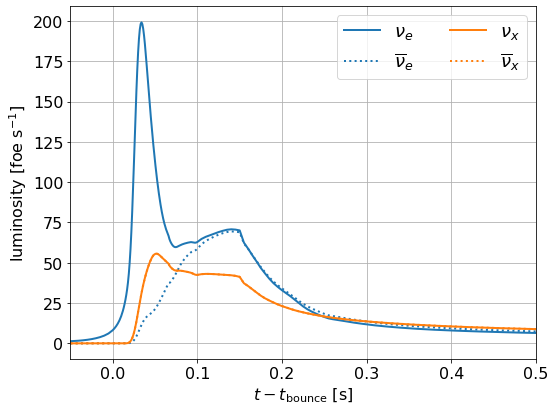

In [4]:
fig, ax = plt.subplots(1, figsize=(8,6))
for flavor in Flavor:

    ax.plot(model.get_time(), model.luminosity[flavor](model.get_time())/1e51, # Report luminosity in units foe/s
            label=flavor.to_tex(),
            color = 'C0' if flavor.is_electron else 'C1',
            ls = '-' if flavor.is_neutrino else ':',
            lw = 2 )

ax.set(xlim=(-0.05, 0.5),
       xlabel=r'$t-t_{\rm bounce}$ [s]',
       ylabel=r'luminosity [foe s$^{-1}$]')
ax.grid()
ax.legend(loc='upper right', ncol=2, fontsize=18)

fig.tight_layout();

## Initial and Oscillated Spectra

Plot the neutrino spectra at the source and after the requested flavor transformation has been applied.

In [5]:
try:
    E = np.linspace(0,100,201)*u.MeV
    t = 0.1*u.s

    ispec = model.get_initialspectra(t, E)
    ospec = model.get_oscillatedspectra(t, E)
except u.UnitConversionError as e:
    print('Attempted interpolation of spectra did not work.\n{}\nTrying again.'.format(e))
    
    E = np.linspace(0,100,201)*u.MeV
    t = 1*u.s
    
    # Note that the energy array must be in units of erg, and must be dimensionless.
    # First try in units of MeV.
    ispec = model.get_initialspectra(t, E.value)
    ospec = model.get_oscillatedspectra(t, E.value)
    
    print('Success!')

Attempted interpolation of spectra did not work.
'' (dimensionless) and 'MeV' (energy) are not convertible
Trying again.
Success!


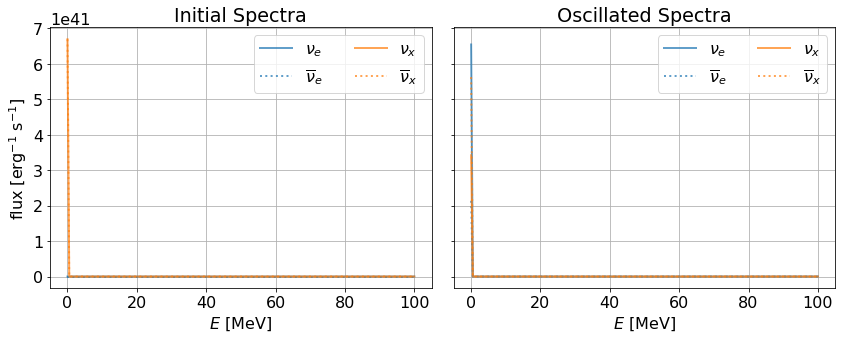

In [6]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True)

for i, spec in enumerate([ispec, ospec]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [MeV]',
           title='Initial Spectra' if i==0 else 'Oscillated Spectra')
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();

In [7]:
# Now try in units of erg.
E = np.linspace(0,100,201)*u.MeV
t = 0.1*u.s
    
# Note that the energy array must be in units of erg, and must be dimensionless.
# Also note that the time *must* be expressed in units of seconds.
ispec = model.get_initialspectra(t, E.to('erg').value)
ospec = model.get_oscillatedspectra(t, E.to('erg').value)

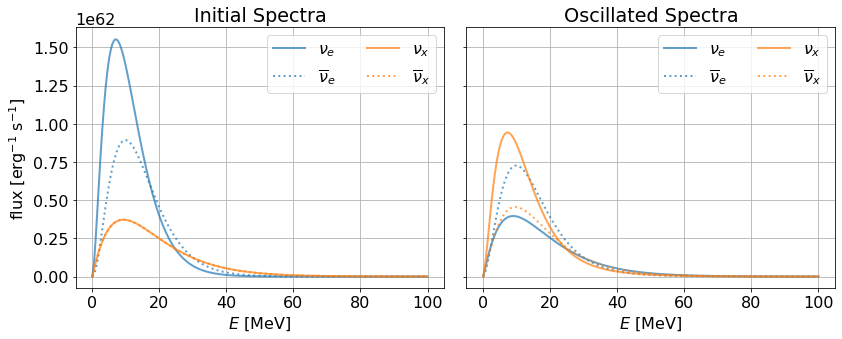

In [8]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True)

for i, spec in enumerate([ispec, ospec]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [MeV]',
           title='Initial Spectra' if i==0 else 'Oscillated Spectra')
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();